In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", 
                        "distance_complete", "supercomputer", "networks")

In [3]:
folder = "connectivity"

In [4]:
e = Experiments()
e.add_experiment(name="0",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"))
e.add_experiment(name="45",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-13"))
e.add_experiment(name="90",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-10"))


In [11]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
 Experiment info should contain path and output
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
 Experiment info should contain path and output
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
 Experiment info should contain path and output


In [14]:
colors = ["grey","green" ,"blue"]

In [15]:
%%time
neuron_type = "dSPN"
connectivity_dspn = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=300, use_network_file=True)

CPU times: user 4min 36s, sys: 21.7 s, total: 4min 58s
Wall time: 4min 58s


In [16]:
%%time
neuron_type = "iSPN"
connectivity_ispn = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=300, use_network_file=True)

CPU times: user 4min 40s, sys: 21.7 s, total: 5min 2s
Wall time: 5min 2s


In [17]:
connectivity = {i : dict() for i in [*e.experiments.keys()]}

In [18]:
for v, k in connectivity_dspn.items():
    connectivity[v].update(k)

In [19]:
for v, k in connectivity_ispn.items():
    connectivity[v].update(k)

In [27]:
customize = {plt.ylim:(0,350)}

In [28]:
name = "synapses_incoming_all_SPN"

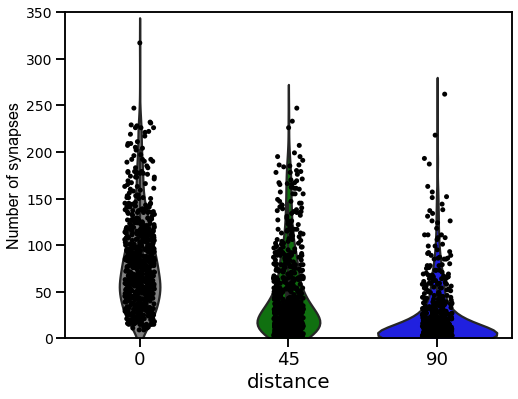

In [29]:
plot_synapses_violin(connectivity, experiment_names=e, colors=colors, name=name, folder=folder, save=True,customize=customize)